<a href="https://colab.research.google.com/github/NBK-code/IMDB_Movie_Rating_Prediction/blob/main/IMDB_mrp_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Neccessary Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#2. Prepare Train, Val and Test Datasets

In [2]:
X_train = pd.read_csv('/content/sample_data/X_train_scaled.csv')
X_val = pd.read_csv('/content/sample_data/X_val_scaled.csv')
X_test = pd.read_csv('/content/sample_data/X_test_scaled.csv')

In [3]:
y_train = pd.read_csv('/content/sample_data/y_train_scaled.csv')
y_val = pd.read_csv('/content/sample_data/y_val_scaled.csv')
y_test = pd.read_csv('/content/sample_data/y_test_scaled.csv')

In [4]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3727, 43), (466, 43), (466, 43), (3727, 2), (466, 2), (466, 2))

In [5]:
X_train.head()

,Unnamed: 0,USA,UK,France,Canada,R,PG-13,PG,G,History,...,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes
0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.498952,-0.913619,-0.520577,-0.824608,-1.963551,-1.720132,0.283456,-1.663723,-0.799471,0.590718
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.251562,-1.610674,2.235354,1.468370,2.521017,1.767974,0.283456,2.133861,2.128717,-1.051257
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.329754,0.170832,0.027888,0.987340,0.715569,-0.074789,0.860275,0.325623,1.772617,-1.051257
3,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.138383,0.546689,0.252142,1.354480,0.801017,2.382668,0.283456,0.818355,0.334583,1.415094
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.534721,1.130255,-1.399331,-0.779355,-0.644141,0.991469,0.283456,-1.074267,-1.688927,-1.051257


In [6]:
y_train.head()

,Unnamed: 0,imdb_score
0,0,5.5
1,1,7.3
2,2,6.3
3,3,8.2
4,4,7.8


In [7]:
X_test.head()

,Unnamed: 0,USA,UK,France,Canada,R,PG-13,PG,G,History,...,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.735613,-0.345177,0.252142,0.221824,-0.827408,-1.106576,-1.073757,0.559955,-0.060395,0.231648
1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.183926,0.467845,0.469015,-0.528296,-1.311966,-1.367711,0.860275,-1.663723,0.101769,0.314002
2,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.116986,0.442207,-0.939779,-0.470996,0.140587,0.613339,-1.073757,0.912601,-0.199589,1.249540
3,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.498952,-0.087962,0.289574,-0.761191,-1.223630,-0.828640,0.283456,-0.144204,-0.131906,-1.051257
4,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.189124,-0.264540,-1.260674,0.517600,0.060209,-0.630798,-1.073757,-0.144204,-0.803069,-1.051257


In [8]:
y_test.head()

,Unnamed: 0,imdb_score
0,0,4.5
1,1,6.8
2,2,5.7
3,3,2.8
4,4,6.7


In [9]:
X_val.head()

,Unnamed: 0,USA,UK,France,Canada,R,PG-13,PG,G,History,...,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,actor_2_facebook_likes,movie_facebook_likes
0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.859042,1.021217,0.198436,0.987340,0.060209,-1.030630,0.860275,-0.060363,0.290482,-1.051257
1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.379516,0.224810,0.439787,-0.588979,-0.264671,-0.315336,0.283456,-0.189359,0.060977,-1.051257
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.649124,-1.610674,0.607601,1.923073,-0.816859,-0.639693,0.860275,-0.189359,0.349171,-1.051257
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.183926,-1.610674,-0.939779,-0.535972,-1.848496,-1.398692,-1.073757,0.016231,-1.004264,0.522649
4,4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.819149,1.189677,0.738932,1.176611,1.718805,1.583604,-1.073757,1.623839,0.836470,1.239672


In [10]:
y_val.head()

,Unnamed: 0,imdb_score
0,0,5.3
1,1,6.0
2,2,6.5
3,3,6.2
4,4,6.4


In [11]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_val.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)
y_val.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_val_np = X_val.to_numpy()

In [14]:
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()
y_val_np = y_val.to_numpy()

In [15]:
X_train_np.shape, X_test_np.shape, X_val_np.shape

((3727, 42), (466, 42), (466, 42))

In [16]:
y_train_np.shape, y_test_np.shape, y_val_np.shape

((3727, 1), (466, 1), (466, 1))

In [17]:
y_train_np = y_train_np.flatten()
y_test_np = y_test_np.flatten()
y_val_np = y_val_np.flatten()

In [18]:
y_train_np.shape, y_test_np.shape, y_val_np.shape

((3727,), (466,), (466,))

#3. Model Training

##3.1. Decision Tree Regressor

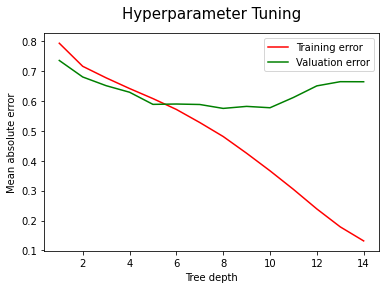

In [19]:
from sklearn.metrics import mean_absolute_error as mae

max_depths = range(1, 15)
training_error = []
val_error = []

min_val_error = 100000
best_max_depth = 0

for max_depth in max_depths:
    model_dtr = DecisionTreeRegressor(max_depth=max_depth)
    model_dtr.fit(X_train_np, y_train_np)
    training_error.append(mae(y_train_np, model_dtr.predict(X_train_np)))
    val_error_for_this_iter = mae(y_val_np, model_dtr.predict(X_val_np))
    val_error.append(val_error_for_this_iter)

    if val_error_for_this_iter < min_val_error:
      best_max_depth = max_depth
      min_val_error = val_error_for_this_iter
    
plt.plot(max_depths, training_error, color='red', label='Training error')
plt.plot(max_depths, val_error, color='green', label='Valuation error')
plt.xlabel('Tree depth')
plt.ylabel('Mean absolute error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [20]:
print("The best value for max_depth:", best_max_depth)

The best value for max_depth: 8


In [21]:
print("The corresponding validation error:", min_val_error)

The corresponding validation error: 0.5747793845540512


Performance on test set:

In [22]:
tree_regressor = DecisionTreeRegressor(max_depth=best_max_depth)

In [23]:
tree_regressor.fit(X_train_np,y_train_np)
predictions = tree_regressor.predict(X_test_np)
errors = abs(predictions - y_test_np)
mape = 100 * (errors / y_test_np)
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%')
print('Test error:', round(mae(y_val_np, tree_regressor.predict(X_test_np)),3))

Test Accuracy: 87.29 %
Test error: 1.006


##3.2. Random Forest Regressor

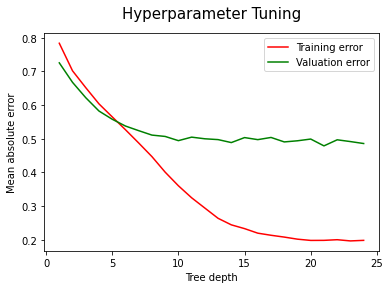

In [24]:
max_depths = range(1, 25)
training_error = []
val_error = []

min_val_error = 100000
best_max_depth = 0

for max_depth in max_depths:
    model_rfr = RandomForestRegressor(n_estimators=50, max_depth=max_depth)
    model_rfr.fit(X_train_np, y_train_np)
    training_error.append(mae(y_train_np, model_rfr.predict(X_train_np)))
    val_error_for_this_iter = mae(y_val_np, model_rfr.predict(X_val_np))
    val_error.append(val_error_for_this_iter)

    if val_error_for_this_iter < min_val_error:
      best_max_depth = max_depth
      min_val_error = val_error_for_this_iter
    
plt.plot(max_depths, training_error, color='red', label='Training error')
plt.plot(max_depths, val_error, color='green', label='Valuation error')
plt.xlabel('Tree depth')
plt.ylabel('Mean absolute error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [25]:
print("The best value for max_depth:", best_max_depth)

The best value for max_depth: 21


In [26]:
print("The corresponding validation error:", min_val_error)

The corresponding validation error: 0.47876990206872355


Performance on test set:

In [27]:
rand_regressor=RandomForestRegressor(n_estimators=50, max_depth = best_max_depth)

In [28]:
rand_regressor.fit(X_train_np,y_train_np)
predictions = rand_regressor.predict(X_test_np)
errors = abs(predictions - y_test_np)
mape = 100 * (errors / y_test_np)
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%')
print('Test error:', round(mae(y_val_np, rand_regressor.predict(X_test_np)),3))

Test Accuracy: 89.33 %
Test error: 1.005


##XGBoost

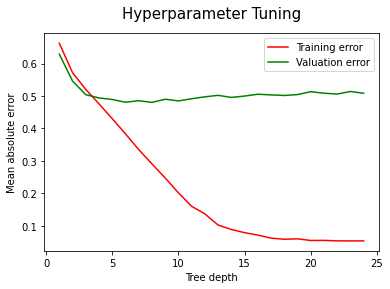

In [29]:
max_depths = range(1, 25)
training_error = []
val_error = []

min_val_error = 100000
best_max_depth = 0

for max_depth in max_depths:
    model_xgbr = XGBRegressor(n_estimators=50, max_depth=max_depth, verbosity = 0)
    model_xgbr.fit(X_train_np, y_train_np)
    training_error.append(mae(y_train_np, model_xgbr.predict(X_train_np)))
    val_error_for_this_iter = mae(y_val_np, model_xgbr.predict(X_val_np))
    val_error.append(val_error_for_this_iter)

    if val_error_for_this_iter < min_val_error:
      best_max_depth = max_depth
      min_val_error = val_error_for_this_iter
    
plt.plot(max_depths, training_error, color='red', label='Training error')
plt.plot(max_depths, val_error, color='green', label='Valuation error')
plt.xlabel('Tree depth')
plt.ylabel('Mean absolute error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [30]:
print("The best value for max_depth:", best_max_depth)

The best value for max_depth: 8


In [31]:
print("The corresponding validation error:", min_val_error)

The corresponding validation error: 0.48027012153756465


Performance on test set:

In [32]:
xgb_regressor=XGBRegressor(n_estimators=50, max_depth = best_max_depth, verbosity = 0)

In [33]:
xgb_regressor.fit(X_train_np,y_train_np)
predictions = xgb_regressor.predict(X_test_np)
errors = abs(predictions - y_test_np)
mape = 100 * (errors / y_test_np)
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%')
print('Test error:', round(mae(y_val_np, xgb_regressor.predict(X_test_np)),3))

Test Accuracy: 89.68 %
Test error: 1.003


##Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [35]:
simple_nn = Sequential()


simple_nn.add(InputLayer((42,)))
simple_nn.add(Dense(30, 'relu'))
simple_nn.add(Dense(20, 'relu'))
simple_nn.add(Dense(5, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.01)
cp = ModelCheckpoint('/content/sample_data/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[MeanAbsoluteError()])
simple_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1290      
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = simple_nn.fit(x=X_train_np, y=y_train_np, validation_data=(X_val_np, y_val_np), callbacks=[cp], epochs=50, batch_size = 64)

Epoch 1/50
59/59 [==============================] - 2s 21ms/step - loss: 10.1088 - mean_absolute_error: 2.3576 - val_loss: 1.2029 - val_mean_absolute_error: 0.8714
Epoch 2/50
59/59 [==============================] - 1s 16ms/step - loss: 1.0484 - mean_absolute_error: 0.7841 - val_loss: 0.8723 - val_mean_absolute_error: 0.7171
Epoch 3/50
59/59 [==============================] - 1s 15ms/step - loss: 0.8703 - mean_absolute_error: 0.7004 - val_loss: 0.7511 - val_mean_absolute_error: 0.6528
Epoch 4/50
59/59 [==============================] - 1s 16ms/step - loss: 0.7797 - mean_absolute_error: 0.6608 - val_loss: 0.7379 - val_mean_absolute_error: 0.6500
Epoch 5/50
59/59 [==============================] - 1s 15ms/step - loss: 0.7136 - mean_absolute_error: 0.6261 - val_loss: 0.6286 - val_mean_absolute_error: 0.5964
Epoch 6/50
59/59 [==============================] - 1s 19ms/step - loss: 0.6607 - mean_absolute_error: 0.6021 - val_loss: 0.6105 - val_mean_absolute_error: 0.5877
Epoch 7/50
59/59 [===

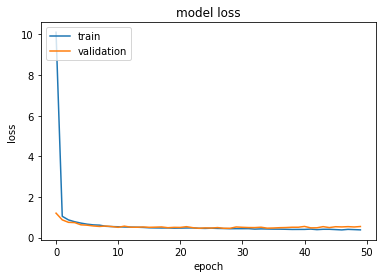

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

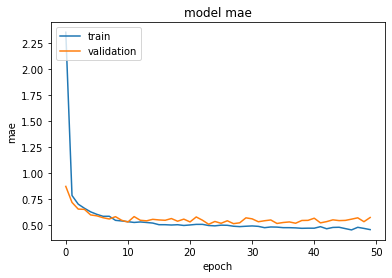

In [38]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
predictions = simple_nn.predict(X_test_np)

In [40]:
errors = abs(predictions - y_test_np)
mape = 100 * (errors / y_test_np)
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%')
print('Test error:', round(mae(y_val_np, simple_nn.predict(X_test_np)),3))

Test Accuracy: 80.23 %
Test error: 1.059


##3. Results

The summary of the different models' performance on the test dataset are as follows:

| Model | Mean Absolute Error | Accuracy |
| --- | --- | --- |
| Decision Tree Regressor | 1.006 | 87.29% |
| Random Forest Regressor | 1.005 | 89.33% |
| XGBoost Regressor | 1.003 | 89.68% |
| Neural Network | 1.059 | 80.23% |

Based on these results, we can conclude that XGBoost performs better than other algorithms, although only by a small distance. It maybe possible to get more juice out of these models by further tuning other hyperparameters. 